In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [73]:
data=pd.read_csv("Train.csv")

In [74]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [76]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [77]:
data.columns


Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64


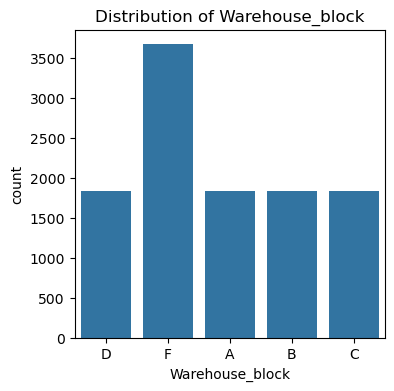

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64


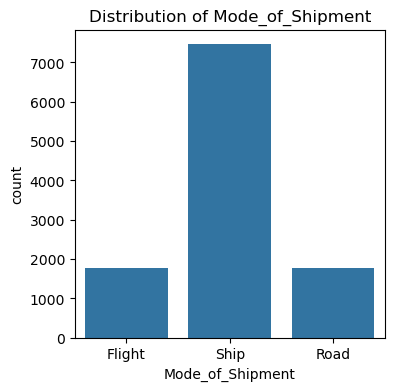

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64


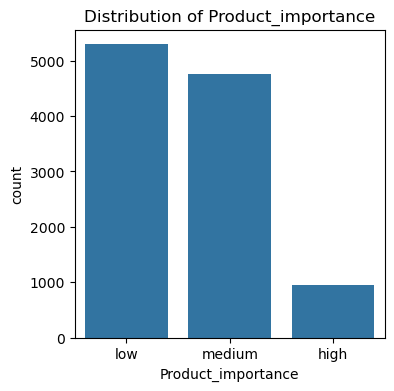

Gender
F    5545
M    5454
Name: count, dtype: int64


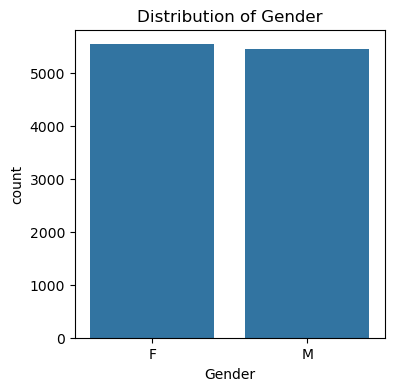

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


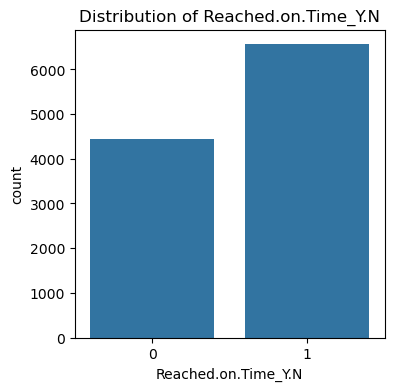

In [78]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']  # update as per actual column names

for col in categorical_cols:
    print(data[col].value_counts())
    plt.figure(figsize=(4,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()


count    10999.000000
mean         4.054459
std          1.141490
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Customer_care_calls, dtype: float64


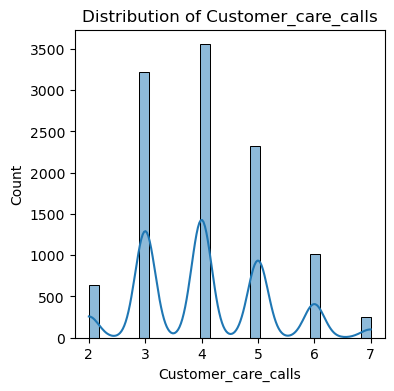

count    10999.000000
mean         2.990545
std          1.413603
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Customer_rating, dtype: float64


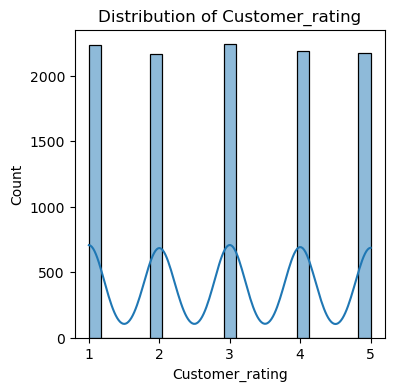

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: Cost_of_the_Product, dtype: float64


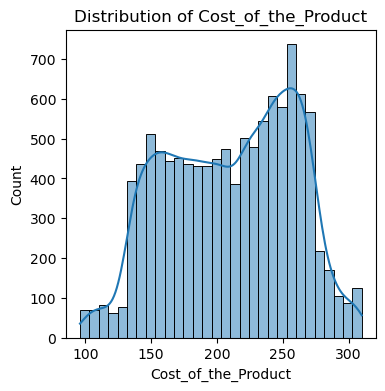

count    10999.000000
mean         3.567597
std          1.522860
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: Prior_purchases, dtype: float64


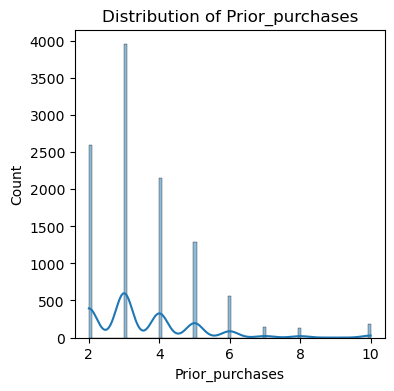

count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64


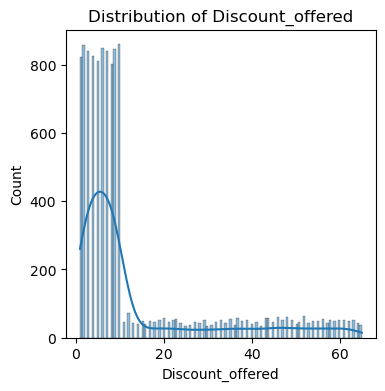

count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%       5050.000000
max       7846.000000
Name: Weight_in_gms, dtype: float64


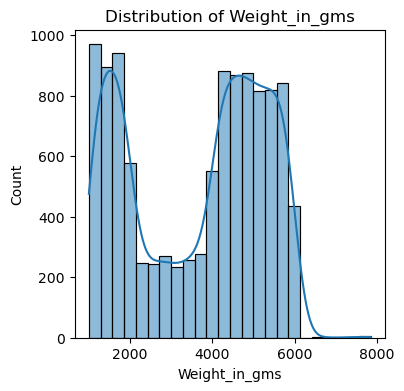

In [79]:
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                  'Prior_purchases', 'Discount_offered', 'Weight_in_gms']  # update as per actual column names

for col in numerical_cols:
    print(data[col].describe())
    plt.figure(figsize=(4,4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()


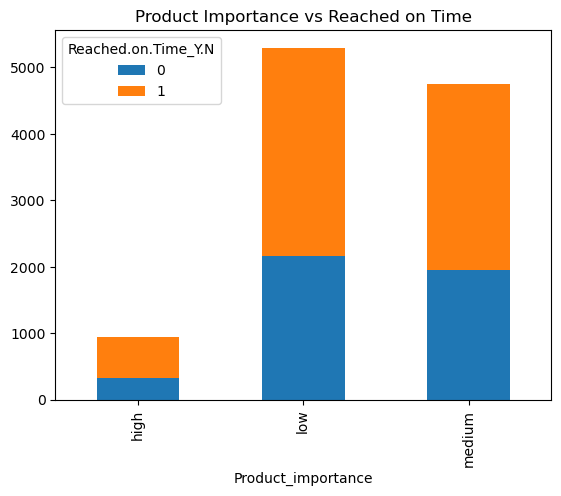

In [80]:
pd.crosstab(data['Product_importance'], data['Reached.on.Time_Y.N']).plot(kind='bar', stacked=True)
plt.title('Product Importance vs Reached on Time')
plt.show()


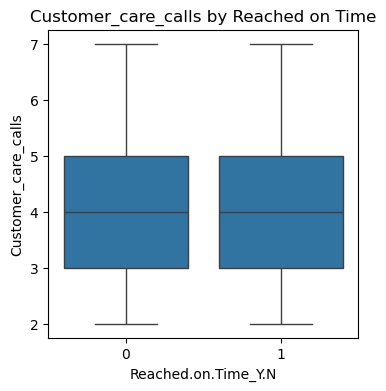

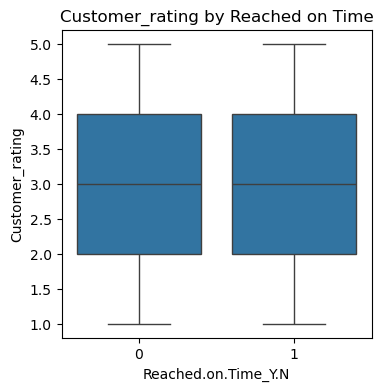

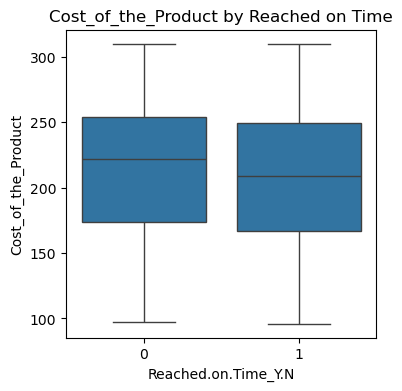

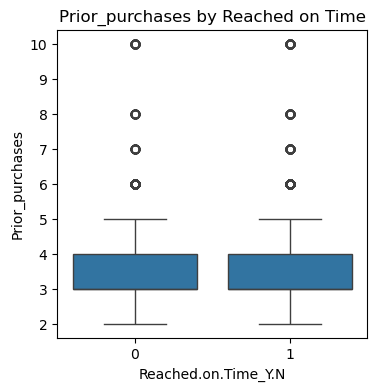

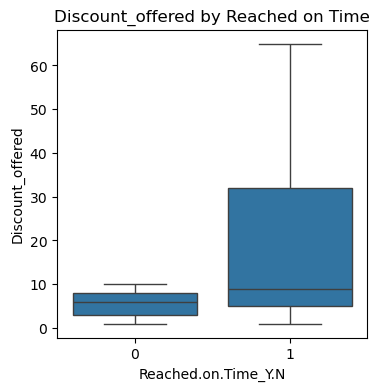

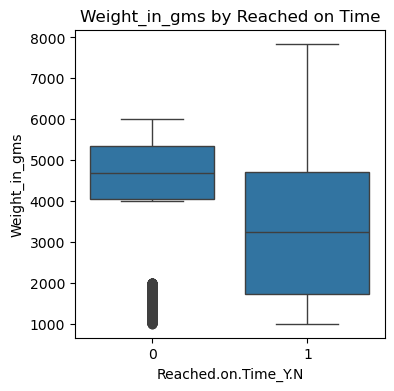

In [81]:
for col in numerical_cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(x='Reached.on.Time_Y.N', y=col, data=data)
    plt.title(f'{col} by Reached on Time')
    plt.show()


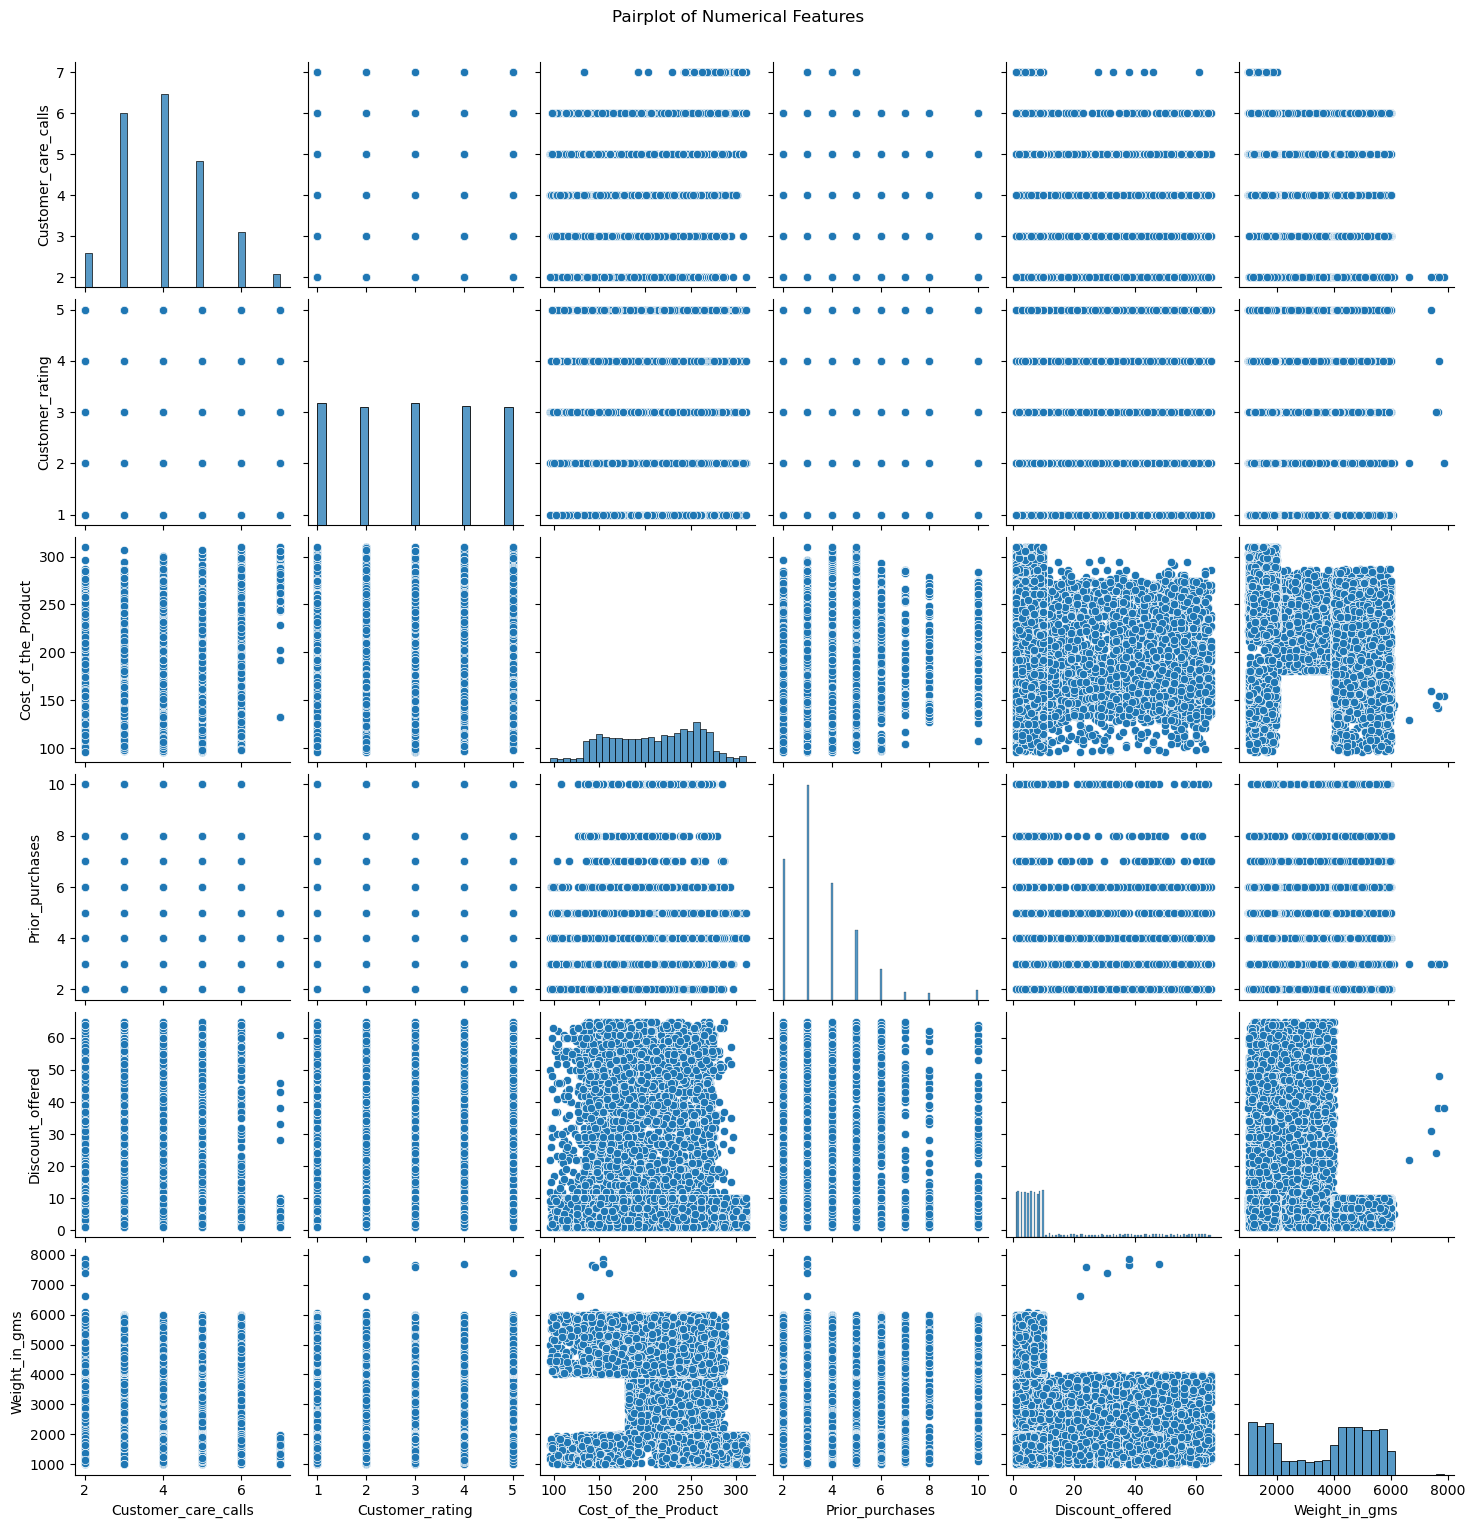

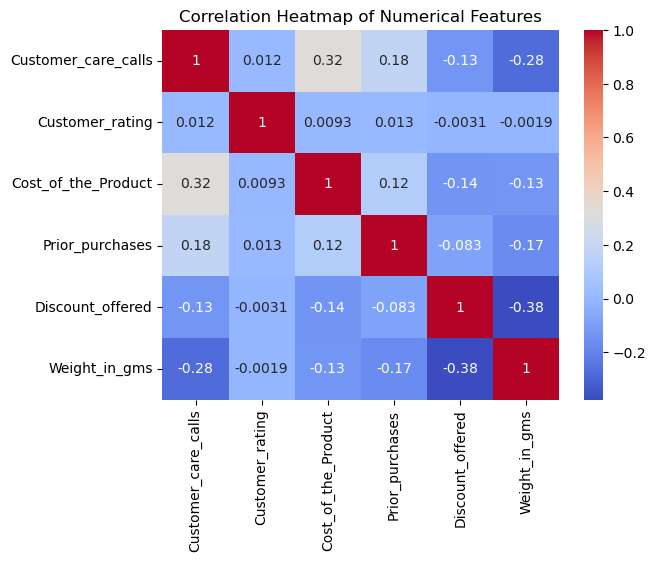

In [82]:
# Pairplot
sns.pairplot(data[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()
# Correlation heatmap
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [83]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [84]:
# Add cost-to-weight ratio feature
data['Cost_to_Weight_Ratio'] = data['Cost_of_the_Product'] / data['Weight_in_gms']

# Check new column
data[['Cost_of_the_Product','Weight_in_gms','Cost_to_Weight_Ratio']].head()


,Cost_of_the_Product,Weight_in_gms,Cost_to_Weight_Ratio
0,177,1233,0.143552
1,216,3088,0.069948
2,183,3374,0.054238
3,176,1177,0.149533
4,184,2484,0.074074


In [85]:
data.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_to_Weight_Ratio
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691,0.079229
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584,0.055913
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000,0.016482
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000,0.039771
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000,0.054916
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000,0.103455


In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# Columns based on your notebook
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
numeric_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                'Prior_purchases', 'Discount_offered', 'Weight_in_gms','Cost_to_Weight_Ratio']

# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)


In [105]:
# Fit the preprocessor on data and transform
X = data.drop('Reached.on.Time_Y.N', axis=1)
y = data['Reached.on.Time_Y.N']
processed = preprocessor.fit_transform(X)

processed


array([[-0.04771132, -0.7007551 , -0.69072171, ...,  1.        ,
         0.        ,  0.        ],
       [-0.04771132,  1.42157771,  0.12074558, ...,  1.        ,
         0.        ,  1.        ],
       [-1.79988745, -0.7007551 , -0.56588059, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82837675,  0.71413344,  0.66172378, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82837675, -0.7007551 ,  0.26639356, ...,  0.        ,
         1.        ,  1.        ],
       [-1.79988745,  1.42157771, -1.14847249, ...,  1.        ,
         0.        ,  0.        ]])

In [106]:
import numpy as np

# Get encoded category names
ohe = preprocessor.named_transformers_['cat']
cat_names = ohe.get_feature_names_out(categorical_cols)

# Combine numeric + encoded names
all_cols = numeric_cols + list(cat_names)

# Create new DataFrame
processed_df = pd.DataFrame(processed.toarray() if hasattr(processed, "toarray") else processed,
                            columns=all_cols)

X=processed_df


In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        10999 non-null  float64
 1   Customer_rating            10999 non-null  float64
 2   Cost_of_the_Product        10999 non-null  float64
 3   Prior_purchases            10999 non-null  float64
 4   Discount_offered           10999 non-null  float64
 5   Weight_in_gms              10999 non-null  float64
 6   Cost_to_Weight_Ratio       10999 non-null  float64
 7   Warehouse_block_B          10999 non-null  float64
 8   Warehouse_block_C          10999 non-null  float64
 9   Warehouse_block_D          10999 non-null  float64
 10  Warehouse_block_F          10999 non-null  float64
 11  Mode_of_Shipment_Road      10999 non-null  float64
 12  Mode_of_Shipment_Ship      10999 non-null  float64
 13  Product_importance_low     10999 non-null  flo

In [108]:
X.shape

(10999, 16)

In [110]:
y.shape

(10999,)

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
print("Train shape :", X_train.shape, y_train.shape)
print("Test shape  :", X_test.shape, y_test.shape)


Train shape : (8799, 16) (8799,)
Test shape  : (2200, 16) (2200,)


In [113]:
import pandas as pd

# Combine features and target into single DataFrames
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save to the project folder
train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

print("Train and test datasets saved successfully.")


Train and test datasets saved successfully.


In [114]:
train_df.shape

(8799, 17)

In [115]:
test_df.shape

(2200, 17)

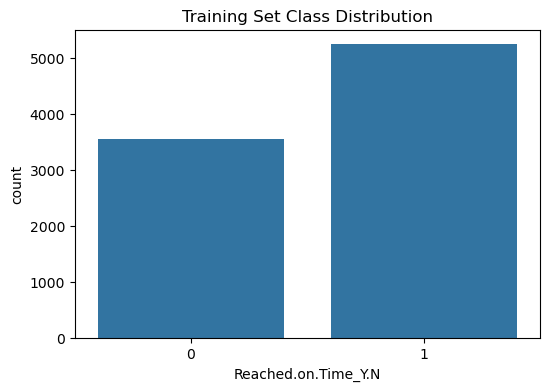

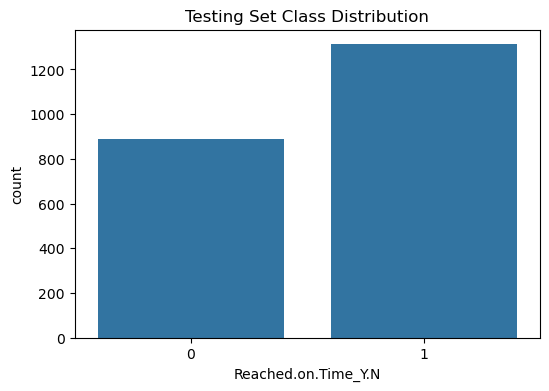

In [116]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Training Set Class Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=y_test)
plt.title("Testing Set Class Distribution")
plt.show()

In [117]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{0: 3549, 1: 5250}

In [118]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Check new class distribution
print("After SMOTE class distribution:", Counter(y_train_resampled))

After SMOTE class distribution: Counter({0: 5250, 1: 5250})


In [119]:
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report,roc_curve,confusion_matrix
from sklearn.pipeline import Pipeline

In [120]:
results = []

xgb_model = XGBClassifier(
    learning_rate=0.05, 
    n_estimators=500, 
    max_depth=6,
    subsample=0.8, 
    colsample_bytree=0.8, 
    reg_lambda=0.5,
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=42
)

pipe = Pipeline([('scaler', StandardScaler()), ('model', xgb_model)])

cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

results.append({
    'Model': "XGBoost",
    'Mean CV Accuracy': round(np.mean(cv_scores), 4),
    'Std Dev': round(np.std(cv_scores), 4)
})

results_df = pd.DataFrame(results).sort_values(by='Mean CV Accuracy', ascending=False)
print("\n Cross-validation results (Overfitting check):")
print(results_df)



 Cross-validation results (Overfitting check):
     Model  Mean CV Accuracy  Std Dev
0  XGBoost            0.6517   0.0129


In [121]:
# Fix random seed for consistency
RND = 42
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RND)

# XGBoost model only
models = {
    "XGBoost": XGBClassifier(
        max_depth=4, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
        reg_lambda=1, n_estimators=200, random_state=RND,
        eval_metric='logloss', use_label_encoder=False
    )
}


In [122]:
# Run cross-validation to check improvement
cv_results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    cv_results.append({
        "Model": name,
        "Mean CV Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    })

In [123]:
# Display results
cv_df = pd.DataFrame(cv_results).sort_values(by="Mean CV Accuracy", ascending=False)
print("\nCross-validation results (After Regularization to Fix Overfitting):")
print(cv_df.to_string(index=False))


Cross-validation results (After Regularization to Fix Overfitting):
  Model  Mean CV Accuracy  Std Dev
XGBoost          0.672464 0.011692


In [124]:
# Fix random seed for consistency
RND = 42
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RND)

# XGBoost model only
models = {
     "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42
    )
}
 


 Training and evaluating XGBoost...

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       710
           1       0.97      0.91      0.94      1050

    accuracy                           0.93      1760
   macro avg       0.93      0.94      0.93      1760
weighted avg       0.94      0.93      0.93      1760



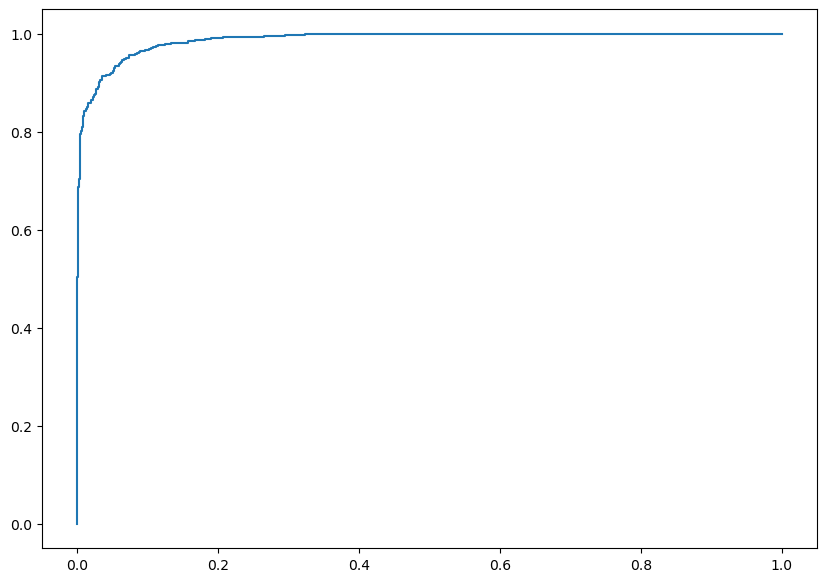

In [125]:
# --- Store results ---
results = {}
comparison = []

plt.figure(figsize=(10, 7))
for name, model in models.items():
    print(f"\n Training and evaluating {name}...")
    
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_prob)
    
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_val, y_val_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
    
    comparison.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })

In [126]:
# --- Final Comparison Table (Only XGBoost) ---
comparison_df = pd.DataFrame([x for x in comparison if x['Model'] == 'XGBoost'])
print("\nFinal Model Comparison Table (XGBoost):")
print(comparison_df)



Final Model Comparison Table (XGBoost):
     Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0  XGBoost    0.9341     0.9746  0.9133     0.943   0.9879


In [127]:
# Fix random seed for consistency
RND = 42
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RND)

# XGBoost model only
models = {
     "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42
    )
}
 


Training and Evaluating: XGBoost
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       710
           1       0.97      0.91      0.94      1050

    accuracy                           0.93      1760
   macro avg       0.93      0.94      0.93      1760
weighted avg       0.94      0.93      0.93      1760



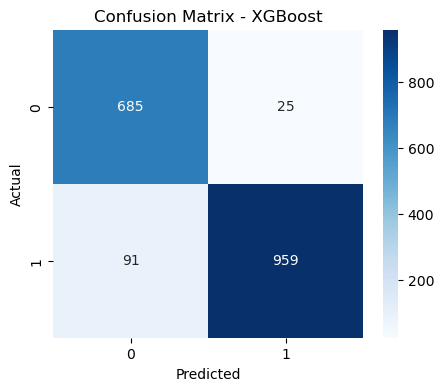

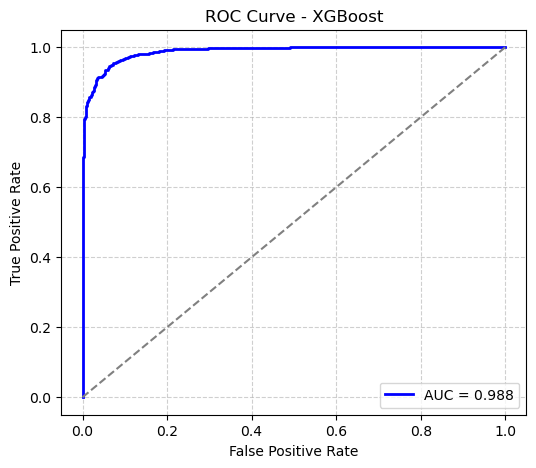

In [128]:
comparison = []

for name, model in models.items():
    print(f"\nTraining and Evaluating: {name}")
    print("-" * 70)
    
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    
    plt.figure(figsize=(5,4))
    sns.heatmap(pd.crosstab(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    

    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Store Results
    comparison.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })

In [129]:
comparison_df = pd.DataFrame(comparison)
print("\nFinal Model Comparison Table:")
print(comparison_df)


Final Model Comparison Table:
     Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0  XGBoost    0.9341     0.9746  0.9133     0.943   0.9879


In [130]:
import joblib

joblib.dump(model, "model.joblib")
joblib.dump(preprocessor, "preprocessor.joblib")

print("✅ Model and preprocessor saved")


✅ Model and preprocessor saved
